In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
num_mice = combined_data.count()[0]
pd.DataFrame({"Number of Mice": [num_mice]})

,Number of Mice
0,1893


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_counts = combined_data.groupby("Mouse ID")
mouse_totals = mouse_counts["Timepoint"].count()
mouse_summary = pd.DataFrame({"Total": mouse_totals})
mouse_summary
mouse_summary.sort_values(["Total"], ascending=False).head(1)

,Total
Mouse ID,
g989,13


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
is_g989 =  combined_data['Mouse ID']=="g989"
Mouse_g989 = combined_data[is_g989]
Mouse_g989.head(13)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = combined_data
new_data = new_data.drop(new_data.index[909])
new_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
num_new_mice = new_data.count()[0]
pd.DataFrame({"Number of New Mice": [num_new_mice]})

,Number of New Mice
0,1892


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_table = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_table = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_table = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dev_table = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_table = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_statistics = pd.DataFrame({"Mean": mean_table, "Median": median_table, "Variance": variance_table, "Standard Deviation": standard_dev_table, "SEM": sem_table})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

single_groupby = new_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg([np.mean,np.median, np.var, np.std, st.sem])
single_groupby

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


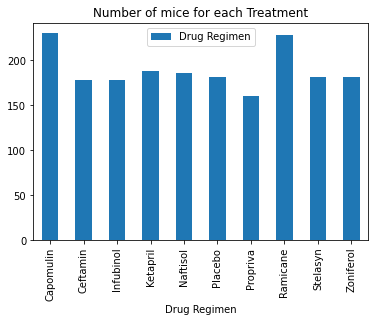

In [10]:
treatment = new_data.groupby('Drug Regimen')
treatment_count = pd.DataFrame(treatment['Drug Regimen'].count())
bar_chart = treatment_count.plot(kind='bar', title='Number of mice for each Treatment')

([<matplotlib.axis.XTick at 0x20330379130>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol')])

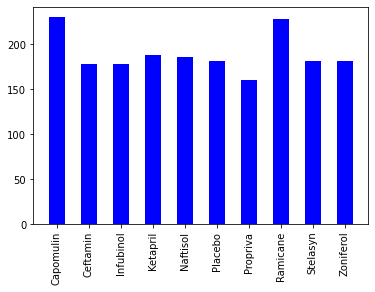

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(treatment_count))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, treatment_count["Drug Regimen"], color='blue', align="center", width = 0.5)
plt.xticks(tick_locations, list(treatment_count.index), rotation="vertical")

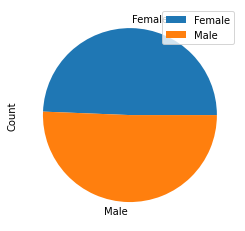

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = new_data.groupby("Sex")
sex_count = pd.DataFrame(sex_data['Drug Regimen'].count())
sex_count = sex_count.rename(columns={"Drug Regimen": "Count"})
sex_count.plot(kind='pie', y = "Count")

([<matplotlib.patches.Wedge at 0x20330446c70>,
 [Text(0.021916657774508554, 1.099781642014448, ''),
  Text(-0.021916760743497157, -1.0997816399624576, '')])

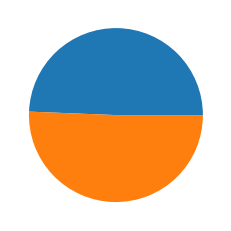

In [13]:
plt.pie(sex_count)

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint = pd.DataFrame(new_data.groupby('Mouse ID')['Timepoint'].max())
greatest_timepoint
new_new_data = pd.merge(new_data, greatest_timepoint, on=["Mouse ID", "Timepoint"])
new_new_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

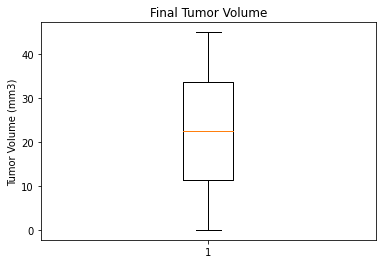

In [16]:
vol = [0,5,10,15,20,25,30,35,40,45]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(vol)
plt.show()

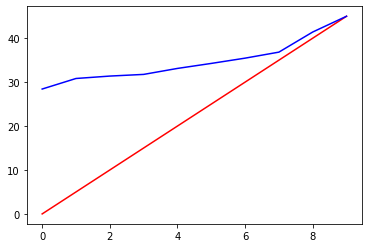

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

time_poin = [0,5,10,15,20,25,30,35,40,45 ]
tumor_volum_m601 = [28.43, 30.83, 31.38 , 31.76, 33.12, 34.26, 35.46, 36.83, 41.41, 45 ]
time_drop, = plt.plot(time_poin, color="red", label="Drugs")
volume, = plt.plot(tumor_volum_m601, color="blue", label="Vol")

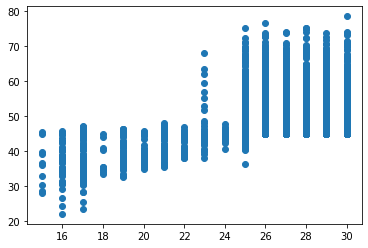

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(new_data['Weight (g)'], new_data['Tumor Volume (mm3)'])

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(new_data['Weight (g)'],new_data['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.59
